<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/Female_Births.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Getting  the dataset

In [44]:
#loading data
df = pd.read_csv('/content/daily-total-female-births-CA.csv')
df

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


## Data Cleaning

In [25]:
# Converting the colun indx to datetime type
df['date'] = pd.to_datetime(df['date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [27]:
# Setting the month column as index
df.set_index('date', inplace=True)

In [28]:
df.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [29]:
# Renaming the births column to Female births
df.rename(columns={'births':'female_births'}, inplace=True)

## Visualization

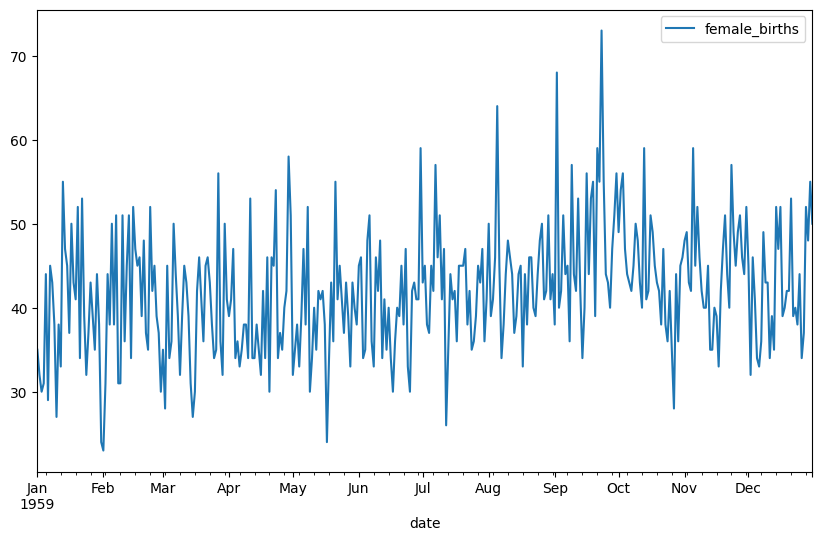

In [30]:
df.plot(figsize=(10, 6))
plt.show()

## Checking for statioanrity

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
result = adfuller(df['female_births'])
print("ADF statistics :%f" % result[0])
print("p-value: %f" % result[1])

ADF statistics :-4.808291
p-value: 0.000052


In [33]:
result

(-4.808291253559765,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [34]:
# Interpretation
adf_statistics = result[0]
p_value = result[1]

if p_value < 0.5:
    print("The time series is stationary (reject null Hypothesis)")

else:
    print("the time seris is not stationary (Fail to reject the null hypothsis)")

The time series is stationary (reject null Hypothesis)


## Decomposing time series data

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

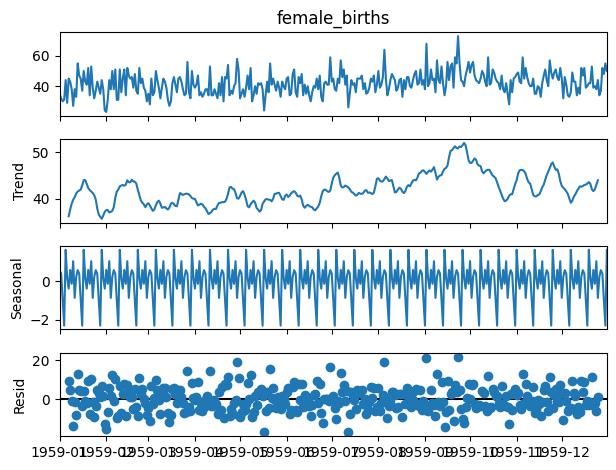

In [36]:
#decompose the time series
result = seasonal_decompose(df['female_births'], model='additive', period=12)
result.plot()
plt.show()

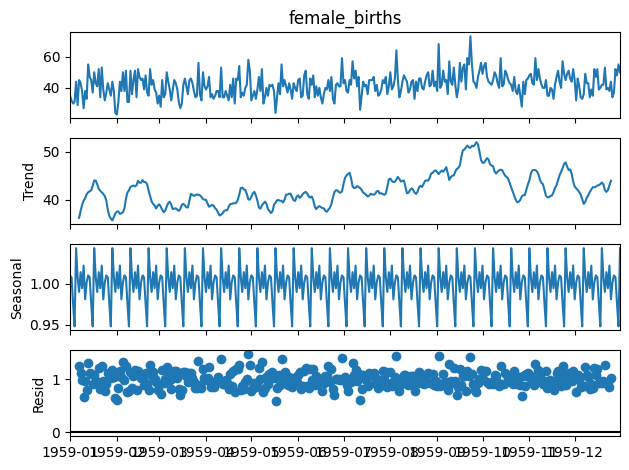

In [37]:
#decompose the time series
result = seasonal_decompose(df['female_births'], model='multiplicative', period=12)
result.plot()
plt.show()

## ACF and PACF Plot

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

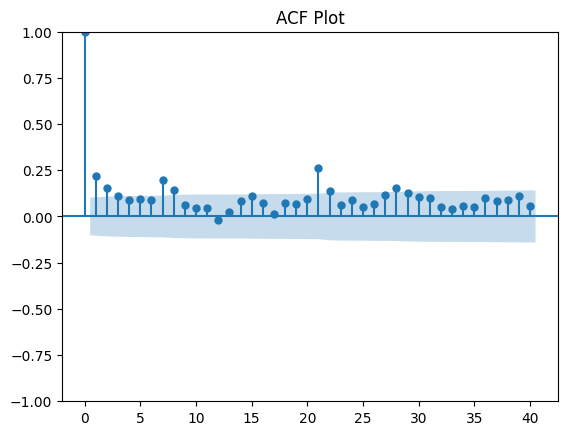

In [39]:
# Creating an acfplot
plot_acf(df['female_births'], lags=40)
plt.title("ACF Plot")
plt.show()

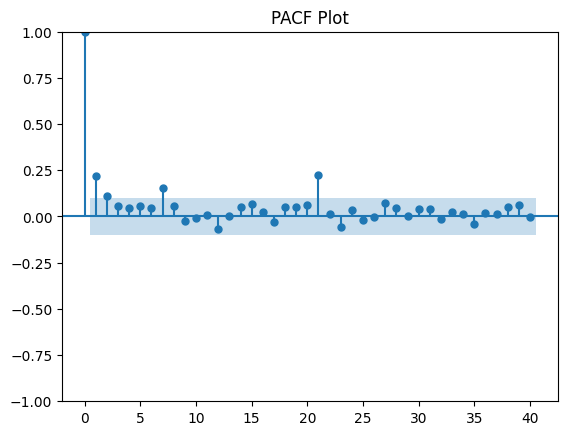

In [40]:
# Creating an pacfplot
plot_pacf(df['female_births'], lags=40)
plt.title("PACF Plot")
plt.show()

## Modelling

### Train-Test Split

In [52]:
train = df[:'1959']
test = df['1960':]

TypeError: cannot do slice indexing on RangeIndex with these indexers [1959] of type str

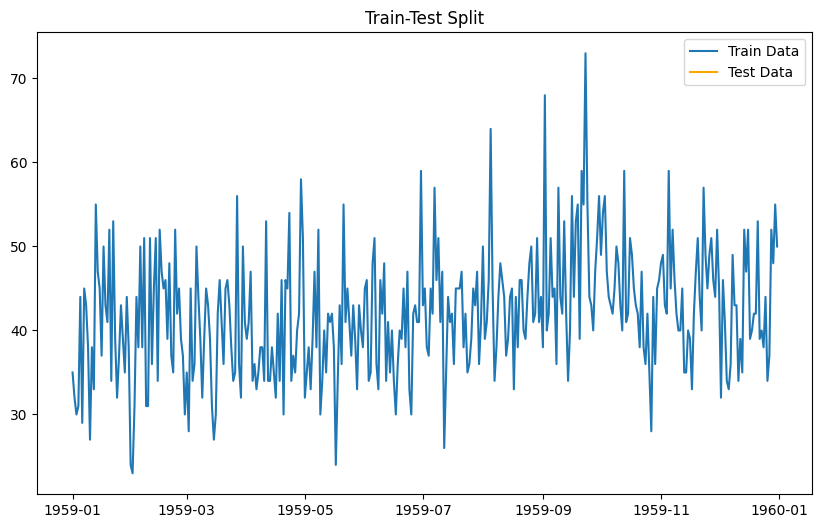

In [42]:
# Plot the train-test split
plt.figure(figsize=(10, 6))
plt.plot(train, label="Train Data")
plt.plot(test, label="Test Data", color='orange')
plt.title("Train-Test Split")
plt.legend()
plt.show()

In [43]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
model_ar = ARIMA(train, order=(2, 0, 0))
ar = model_ar.fit()
print(ar.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          female_births   No. Observations:                  365
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1234.182
Date:                Mon, 13 Jan 2025   AIC                           2476.364
Time:                        10:57:25   BIC                           2491.963
Sample:                    01-01-1959   HQIC                          2482.563
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9816      0.568     73.885      0.000      40.868      43.095
ar.L1          0.1939      0.055      3.544      0.000       0.087       0.301
ar.L2          0.1139      0.055      2.070      0.0

In [46]:
model_ma = ARIMA(train, order=(0, 0,2))
ma = model_ma.fit()
print(ma.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          female_births   No. Observations:                  365
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1235.566
Date:                Mon, 13 Jan 2025   AIC                           2479.132
Time:                        10:57:49   BIC                           2494.732
Sample:                    01-01-1959   HQIC                          2485.331
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9817      0.514     81.721      0.000      40.975      42.989
ma.L1          0.1845      0.054      3.408      0.001       0.078       0.291
ma.L2          0.1154      0.051      2.243      0.0

In [47]:
model_arma = ARIMA(train, order=(2, 0,2))
arma = model_arma.fit()
print(arma.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          female_births   No. Observations:                  365
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1227.849
Date:                Mon, 13 Jan 2025   AIC                           2467.698
Time:                        10:58:11   BIC                           2491.097
Sample:                    01-01-1959   HQIC                          2476.997
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8146      1.498     27.920      0.000      38.879      44.750
ar.L1          0.0201      0.029      0.691      0.490      -0.037       0.077
ar.L2          0.9454      0.028     33.380      0.0

In [49]:
arima_train_predictions = arima.fittedvalues
arima_test_predictions = arima.forecast(len(test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df, label="Actual Data", color='blue')
plt.plot(train.index, arima_train_predictions, label="Train Predictions", color='green')
plt.plot(test.index, arima_test_predictions, label="Test Predictions", color='red')
plt.title("ARIMA Forecasting")
plt.legend()
plt.show()

NameError: name 'arima' is not defined

In [50]:
model_sarima = SARIMAX(train, order=(2, 2 ,2), seasonal_order=(2, 2, 2, 12))
sarima = model_sarima.fit()
print(sarima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                      female_births   No. Observations:                  365
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood               -1222.248
Date:                            Mon, 13 Jan 2025   AIC                           2462.496
Time:                                    11:00:42   BIC                           2496.930
Sample:                                01-01-1959   HQIC                          2476.218
                                     - 12-31-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1355      0.072      1.876      0.061      -0.006       0.277
ar.L2          0.0689      0.061   

In [51]:
sarima_train_predictions = sarima.fittedvalues
sarima_test_predictions = sarima.forecast(len(test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df, label="Actual Data", color='blue')
plt.plot(train.index, sarima_train_predictions, label="Train Predictions", color='green')
plt.plot(test.index, sarima_test_predictions, label="Test Predictions", color='red')
plt.title("ARIMA Forecasting")
plt.legend()
plt.show()

ValueError: Prediction must have `end` after `start`.

In [6]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000
